# The Coffee Shop Mystery Part B: The Correlation Conundrum

## Previously on Coffee Shop Mystery...

When we last left our heroes, Max was in crisis mode over *Café Chaos*'s mysteriously erratic sales, Jazz was perfecting his latte art, and Mira was unleashing her inner data detective. They discovered some strange patterns, but nothing that explained the real story...




## Back at the Café...
![Anime Scene 2](anime/B_anim/b_main.png)
"Alright," Mira announces, setting up her laptop next to a fresh cappuccino. "Time to try some classic detective tools."

"Like fingerprint dusting?" Max asks hopefully.

"Better," Mira grins. "We're going to use correlation and regression. They're like... the Sherlock and Watson of data analysis."

"Oh great," Jazz mutters while steaming milk, "more math."

"Think of correlation like your coffee-to-milk ratio," Mira explains. "When two things move together in perfect harmony - like how more coffee means more milk in a latte. Regression is like your recipe book - it tries to write down the exact rules for that relationship."

In [6]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Add the src directory to path for imports
src_dir = os.path.join(os.path.dirname(os.getcwd()), 'src')
sys.path.append(src_dir)

from data_generator import DataGenerator


# Set up our analytical tools
sns.set_style("whitegrid")

# Get our café data back
generator = DataGenerator(seed=42)
data = generator.generate_data(n_days=200, include_hidden=True)

## First Stop: Correlation Station

"Let's start with correlation," Mira says, fingers dancing across the keyboard. "It'll tell us if there's any relationship between your sales and... well, everything else."

Max leans in. "Like whether cold weather actually brings in customers?"

"Exactly! Though remember - correlation is like two customers always arriving together. You know they're connected somehow, but you don't know if one is dragging the other here, or if they both just happen to work at the same office."

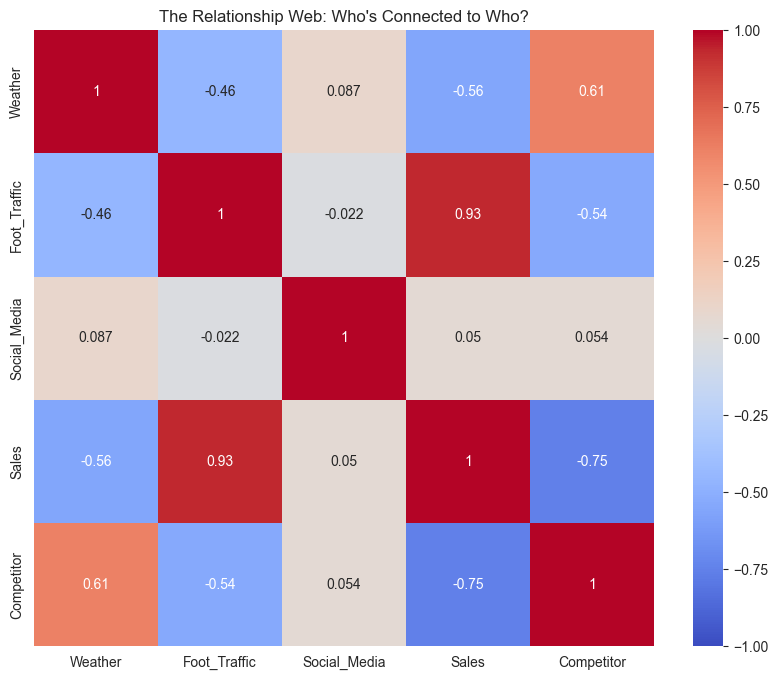


Relationships with Sales (from strongest to weakest):
Foot_Traffic: 0.931
Social_Media: 0.050
Weather: -0.559
Competitor: -0.754


In [7]:
# Calculate correlations
correlation_matrix = data.corr()

# Create a heatmap that's easy on the eyes
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('The Relationship Web: Who\'s Connected to Who?')
plt.show()

# Let's look at the specific relationships with sales
sales_correlations = correlation_matrix['Sales'].sort_values(ascending=False)
print("\nRelationships with Sales (from strongest to weakest):")
for var, corr in sales_correlations.items():
    if var != 'Sales':
        print(f"{var}: {corr:.3f}")

## A Closer Look at the Relationships

"Hmm," Mira muses, studying the heatmap. "These patterns are... interesting."

"I see lots of colors," Max says helpfully. "Red is bad, right?"

"Not exactly. Red means strong positive relationship, blue means strong negative. But let's look at each variable separately - sometimes it helps to see the actual patterns."

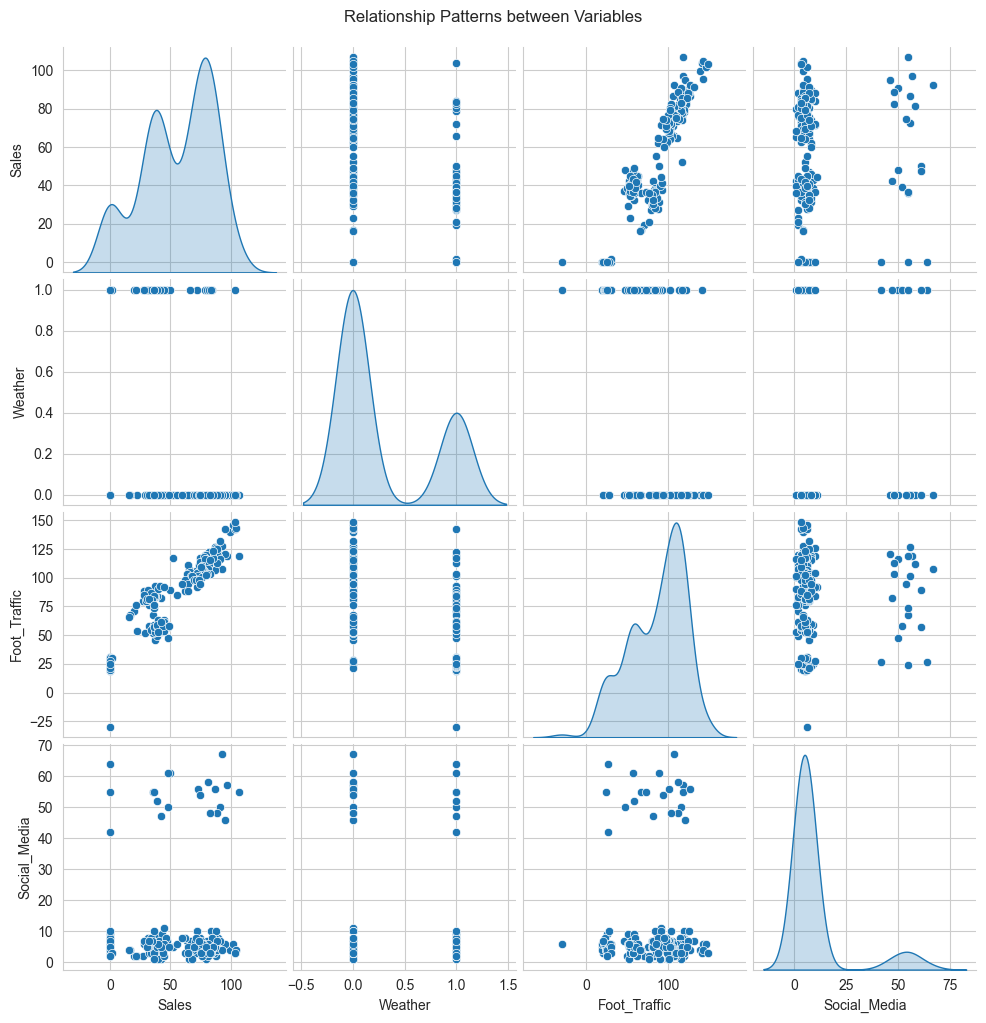

In [8]:
# Create pair plots to visualize relationships
variables = ['Sales', 'Weather', 'Foot_Traffic', 'Social_Media']
sns.pairplot(data[variables], diag_kind='kde')
plt.suptitle('Relationship Patterns between Variables', y=1.02)
plt.show()

## A Closer Look at the Relationships

*"Let's decode this data story," Mira says, gesturing to the colorful heatmap. "It's like a recipe showing how everything mixes together."*

*"I see red and blue squares," Max notes. "Like our hot and cold drinks menu?"*

*"Exactly! And just like how some drinks pair better than others, some factors have stronger relationships. Look at foot traffic and sales - that dark red square shows a correlation of 0.93. It's like the perfect espresso-to-milk ratio in a latte."*

Jazz peers at the numbers. *"So more feet mean more sales? Groundbreaking,"* they say with friendly sarcasm.

*"Ah, but look at the competitor effect,"* Mira points to the deep blue square. *"-0.75! When they're active, your sales drop dramatically. Like having a street vendor selling dollar coffee right outside."*

*"And weather?"* Max asks, already seeing the pattern.

*"Moderate negative relationship at -0.56. Cold days hurt sales, but not as much as competitors. Think of it like rain - it affects business, but loyal customers still come."*

*"What about our social media posts?"* Jazz asks, phone in hand.

*"Barely a blip at 0.05,"* Mira admits. *"Like adding an extra shot to a large latte - might make a difference, but hard to notice in the big picture."*

*"So what you're saying is..."* Max starts.

*"Your business is like a well-crafted drink - foot traffic is your espresso base, competitors are your bitter notes, weather adds complexity, and social media is just a sprinkle of cinnamon on top."*

*"But,"* Mira adds with a knowing smile, *"this is just correlation. To really understand what's causing what..."*

*"Don't tell me,"* Jazz groans. *"More math?"*

*"Oh, just wait until you see what instrumental variables can tell us!"* Mira grins.


## Time for Some Regression Therapy

"Now," Mira says, "let's try something a bit more ambitious. We'll use regression to create a 'sales prediction recipe.'"

"Like our cold brew recipe?" Jazz asks, suddenly interested.

"Exactly! But instead of water-to-coffee ratios, we're looking at how weather, foot traffic, and social media combine to affect sales. And just like with a new recipe, we'll test it out on a small batch first."

"You mean we're going to split the data?" Max asks, proud of remembering something from their previous discussion.

"Look who's been paying attention!" Mira grins. "Yes, we'll use most of our data to create the recipe (training data), and save some to test if it actually works (testing data)."

In [9]:
# Prepare features and target
features = ['Weather', 'Foot_Traffic', 'Social_Media']
X = data[features]
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train our linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Print the recipe coefficients
print("Our Sales Prediction Recipe:")
print("Base sales level:", f"{model.intercept_:.2f}")
for feature, coefficient in zip(features, model.coef_):
    print(f"Impact of {feature}: {coefficient:.2f}")

# Calculate performance metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nHow well does our recipe work?")
print(f"Training Score (R²): {train_r2:.3f}")
print(f"Testing Score (R²): {test_r2:.3f}")
print(f"Training Error (RMSE): {train_rmse:.2f}")
print(f"Testing Error (RMSE): {test_rmse:.2f}")

Our Sales Prediction Recipe:
Base sales level: -5.04
Impact of Weather: -11.72
Impact of Foot_Traffic: 0.73
Impact of Social_Media: 0.13

How well does our recipe work?
Training Score (R²): 0.892
Testing Score (R²): 0.906
Training Error (RMSE): 9.39
Testing Error (RMSE): 9.87


## Looking at Our Predictions

"Let's see how well our predictions match reality," Mira suggests. "It's like comparing the latte you made to the picture in the recipe book."

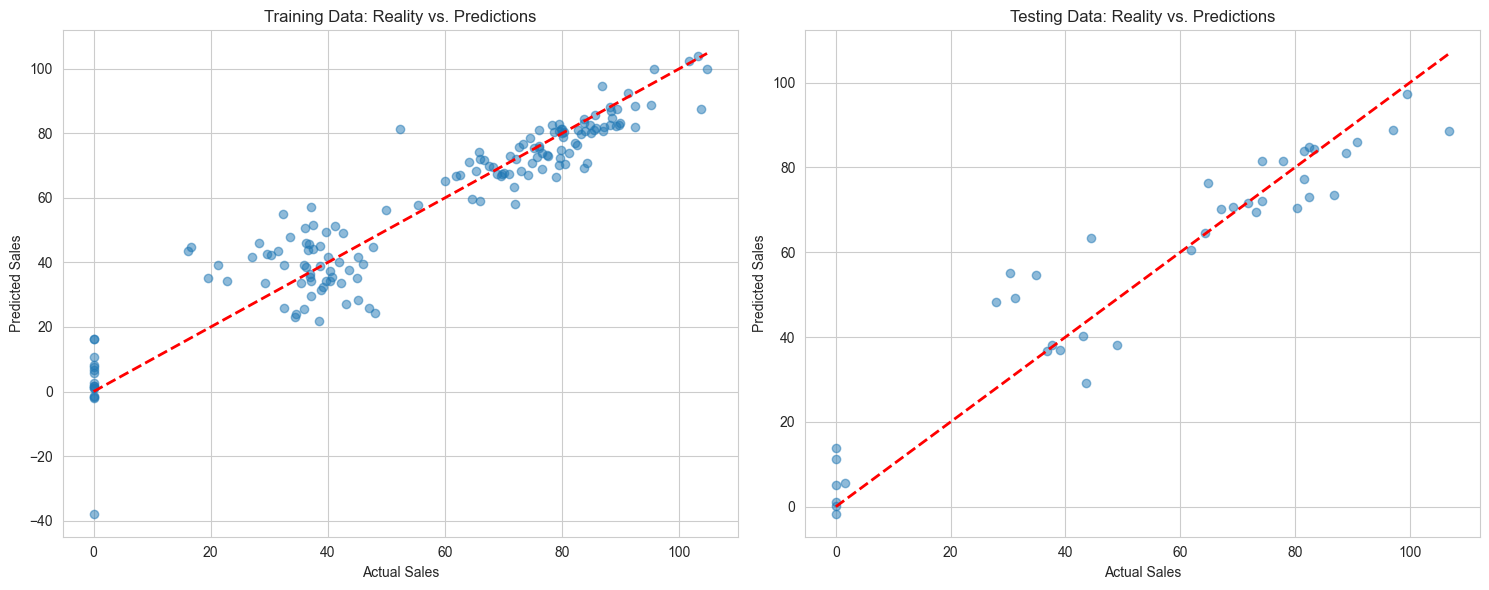

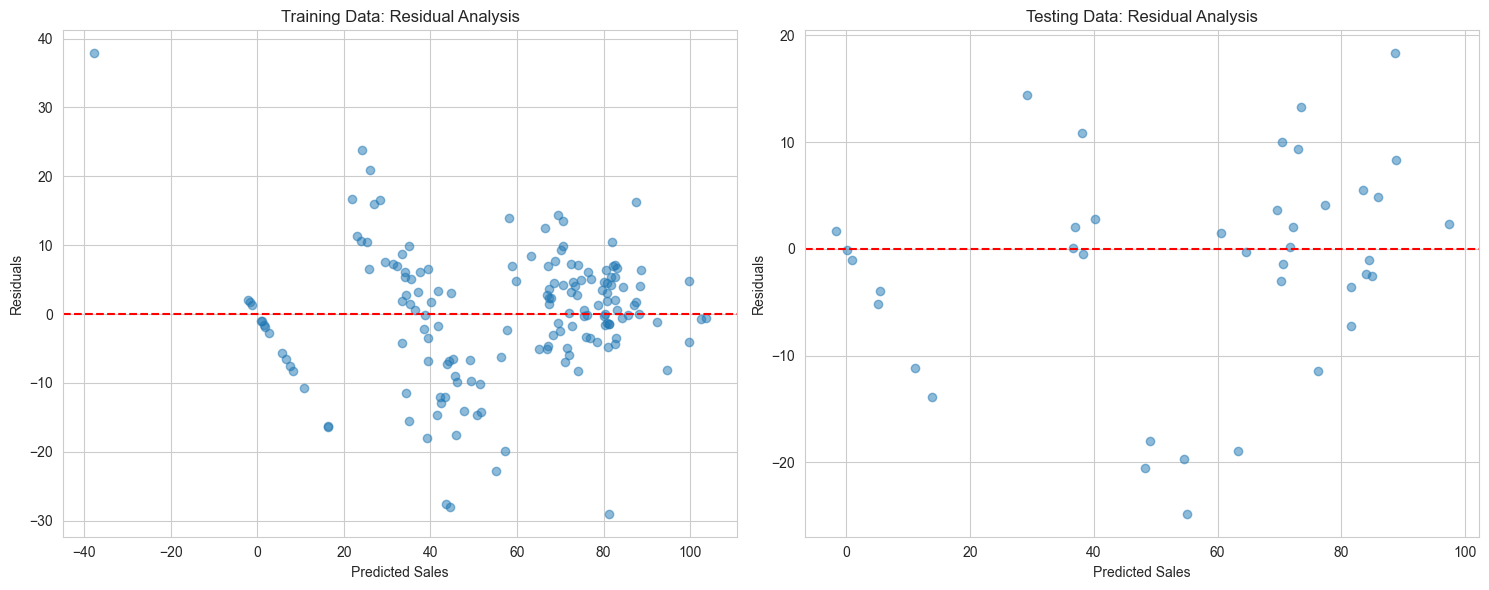

In [10]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot training predictions
ax1.scatter(y_train, y_train_pred, alpha=0.5)
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Sales')
ax1.set_ylabel('Predicted Sales')
ax1.set_title('Training Data: Reality vs. Predictions')

# Plot testing predictions
ax2.scatter(y_test, y_test_pred, alpha=0.5)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Sales')
ax2.set_ylabel('Predicted Sales')
ax2.set_title('Testing Data: Reality vs. Predictions')

plt.tight_layout()
plt.show()

# Let's also look at the residuals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training residuals
residuals_train = y_train - y_train_pred
ax1.scatter(y_train_pred, residuals_train, alpha=0.5)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_xlabel('Predicted Sales')
ax1.set_ylabel('Residuals')
ax1.set_title('Training Data: Residual Analysis')

# Testing residuals
residuals_test = y_test - y_test_pred
ax2.scatter(y_test_pred, residuals_test, alpha=0.5)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Sales')
ax2.set_ylabel('Residuals')
ax2.set_title('Testing Data: Residual Analysis')

plt.tight_layout()
plt.show()

## The Plot Twist

Mira studies the prediction plots, stirring her coffee thoughtfully. *"Well, this recipe tells quite a story."*

*"Good or bad?"* Max asks nervously.

*"Let's break it down like a coffee tasting,"* Mira says. *"Our model's base prediction starts at -5 units - like having an empty café. Then each factor adds its own 'flavor':*

- **Weather knocks off about 12 sales** - that's a strong bitter note  
- **Each extra customer adds 0.73 sales** - your conversion rate, like extraction time  
- **Social media barely adds 0.13** - just a sprinkle of cinnamon  

*"But those R-squared numbers look good!"* Max points out. *"0.89 and 0.90?"*

Jazz, now interested despite themselves, leans in. *"Yeah, isn't that like getting a near-perfect shot?"*

*"Ah,"* Mira smiles, pointing to the residual plots. *"See these scattered points? They're like inconsistent tamping - sometimes we're off by 9 or 10 sales in either direction. And look at these patterns... it's like when your espresso looks right but tastes wrong."*

*"Something's missing from the recipe?"* Jazz guesses.

*"Exactly! These basic tools are like using just a timer for espresso - they'll get you close, but for perfect extraction..."*

*"We need fancier equipment?"* Max sighs.

*"Oh yes,"* Mira's eyes gleam. *"Wait until you see what instrumental variables can do. It's like upgrading from a basic machine to..."* she glances at their high-end espresso maker, *"well, to that beauty."*

Jazz raises an eyebrow. *"Statistics that fancy?"*

*"Just wait,"* Mira grins. *"The real mystery is only beginning..."*

---

**To be continued in Part C: Enter the Causal World...**

*(Will more advanced analytics reveal the truth? Is there a hidden factor sabotaging Max's business? And will Jazz ever get interested enough in statistics to stop making latte art? Stay tuned...)*